## Random Forest Regression on mRNA splicing efficiency

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def fit_scatter(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Observed AUC')
    ax.set_ylabel('Predicted AUC')
    ax.set_title('')

In [3]:
data_path = os.path.join(os.getcwd(), 'datasets', 'features.csv')
data_path_rp = os.path.join(os.getcwd(), 'datasets', 'rp_features.csv')
data_path_nrp = os.path.join(os.getcwd(), 'datasets', 'nrp_features.csv')

gene_features = pd.read_csv(data_path, delimiter = ',')
rp_gene_features = pd.read_csv(data_path_rp, delimiter = ',')
nrp_gene_features = pd.read_csv(data_path_nrp, delimiter = ',')

print('Number of data points: {}. Number of attributes: {}'.format(gene_features.shape[0],gene_features.shape[1]))

Number of data points: 117. Number of attributes: 101


In [4]:
gene_features.head(8)

,ORG,Gene,AUC,Gene len (bp),Exon1 len (bp),Exon2 len (bp),Intron len (bp),5ss-BP len (bp),BP-3ss len (bp),"ΔG per bp, intron",...,GUC,CUC,AGC,UGC,GGC,CGC,ACC,UCC,GCC,CCC
0,YFL039C,ACT1,0.481,1437,10,1118,309,266,44,-0.161,...,0.007,0.020,0.003,0.020,0.003,0.003,0.013,0.013,0.000,0.010
1,YDL029W,ARP2,0.235,1299,22,1154,123,109,15,-0.227,...,0.000,0.025,0.008,0.025,0.017,0.000,0.017,0.000,0.017,0.033
2,YML036W,CGI121,0.740,652,456,90,106,65,42,-0.092,...,0.000,0.010,0.010,0.000,0.000,0.000,0.029,0.010,0.010,0.000
3,YBL059C-A,CMC2,0.856,415,34,296,85,57,29,-0.074,...,0.000,0.024,0.000,0.024,0.000,0.000,0.000,0.036,0.012,0.024
4,YKL190W,CNB1,0.499,604,52,476,76,58,19,-0.143,...,0.000,0.000,0.000,0.000,0.000,0.000,0.014,0.000,0.000,0.000
5,YLL050C,COF1,0.483,611,14,418,179,47,133,-0.228,...,0.006,0.028,0.006,0.011,0.000,0.006,0.000,0.023,0.006,0.006
6,YIL111W,COX5B,0.219,544,1,455,88,57,32,-0.125,...,0.000,0.000,0.012,0.012,0.000,0.000,0.000,0.012,0.000,0.000
7,YNL130C,CPT1,0.586,1274,50,1132,92,58,35,-0.076,...,0.000,0.000,0.000,0.022,0.011,0.000,0.011,0.000,0.000,0.011


In [4]:
X = gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
y = gene_features['AUC']

X_rp = rp_gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
y_rp = rp_gene_features['AUC']

X_nrp = nrp_gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
y_nrp = nrp_gene_features['AUC']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)
X_rp_train, X_rp_test, y_rp_train, y_rp_test = train_test_split(X_rp, y_rp, train_size = 0.9, test_size=0.1, random_state=0)
X_nrp_train, X_nrp_test, y_nrp_train, y_nrp_test = train_test_split(X_nrp, y_nrp, train_size = 0.9, test_size=0.1, random_state=0)

In [6]:
variable_names = X_rp.columns.values
#sns.pairplot(rp_gene_features, x_vars=variable_names, y_vars='AUC')

In [7]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)

In [9]:
lr = LinearRegression()
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)
predictions = cross_val_predict(lr,X,y=y,cv=kf)

print('Coefficient of determination: {}'.format(r2_score(y, predictions)))
print('Mean absolute error: {}'.format(mean_absolute_error(y, predictions)))
print('Root mean squared error: {}'.format(np.sqrt(mean_squared_error(y, predictions))))

Coefficient of determination: -7.218302015333855
Mean absolute error: 0.4702581683241454
Root mean squared error: 0.6546933285937646


In [10]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)
print('\n')
rfr = RandomForestRegressor()
predictions_rfr = cross_val_predict(rfr,X,y=y,cv=kf)

print('RandomForestRegressor R^2: {}'.format(r2_score(y, predictions_rfr)))
print('RandomForestRegressor MAE: {}'.format(mean_absolute_error(y, predictions_rfr)))
print('RandomForestRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr))))
print('RandomForestRegressor CC: \n{}'.format(np.corrcoef(y, predictions_rfr)))



RandomForestRegressor R^2: 0.28234237106722304
RandomForestRegressor MAE: 0.14117179487179488
RandomForestRegressor RMSE: 0.19346638635580252
RandomForestRegressor CC: 
[[ 1.          0.54020503]
 [ 0.54020503  1.        ]]


Text(0.5,1,'Random forest max features=1 , max depth=10')

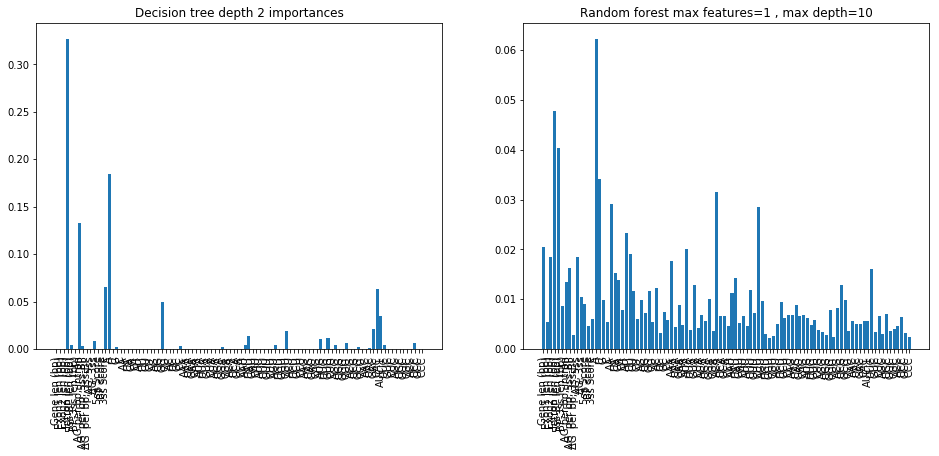

In [8]:
dt = DecisionTreeRegressor(criterion='mse', max_depth=15, random_state=1337)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=300, 
                            criterion='mse', 
                            max_features=10, 
                            max_depth=15, 
                            n_jobs=2,
                            random_state=1337)

rf.fit(X_train, y_train)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
xx = np.arange(len(dt.feature_importances_))
ax1.bar(xx, dt.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Decision tree depth 2 importances')
ax2.bar(xx, rf.feature_importances_)
ax2.set_xticks(xx)
ax2.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax2.set_title('Random forest max features=1 , max depth=10')

#for i, column in enumerate(gene_features.drop(['ORG','Gene','AUC'], axis=1)):
#    print('Importance of feature {}, DT: {:.3f}, RF: {:.3f}'.format(column, dt.feature_importances_[i], rf.feature_importances_[i]))

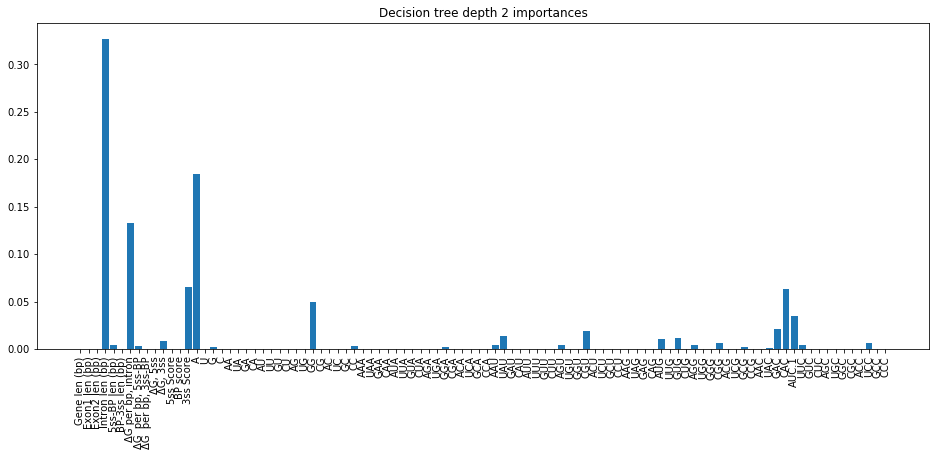

In [12]:
fig, ax1 = plt.subplots(figsize=(16,6))
xx = np.arange(len(dt.feature_importances_))
ax1.bar(xx, dt.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Decision tree depth 2 importances')

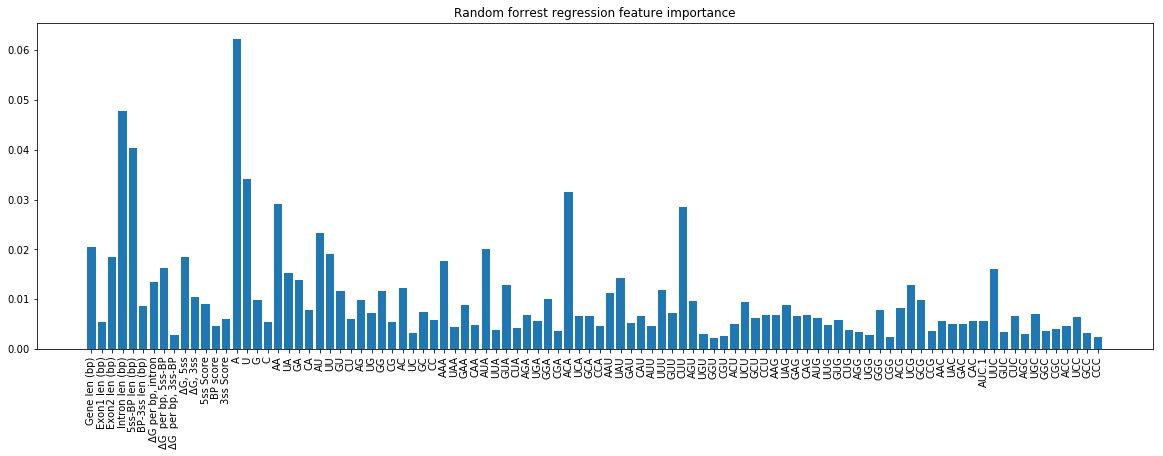

In [13]:
dt = DecisionTreeRegressor(criterion='mse', max_depth=15, random_state=1337)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=300, 
                            criterion='mse', 
                            max_features=10, 
                            max_depth=15, 
                            n_jobs=2,
                            random_state=1337)

rf.fit(X_train, y_train)

fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rf.feature_importances_))
ax1.bar(xx, rf.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Random forrest regression feature importance')

fig.savefig('Project_features_importance.pdf',bbox_inches = 'tight')

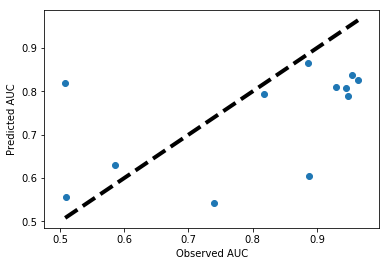

In [14]:
fit_scatter(y_test, rf.predict(X_test))

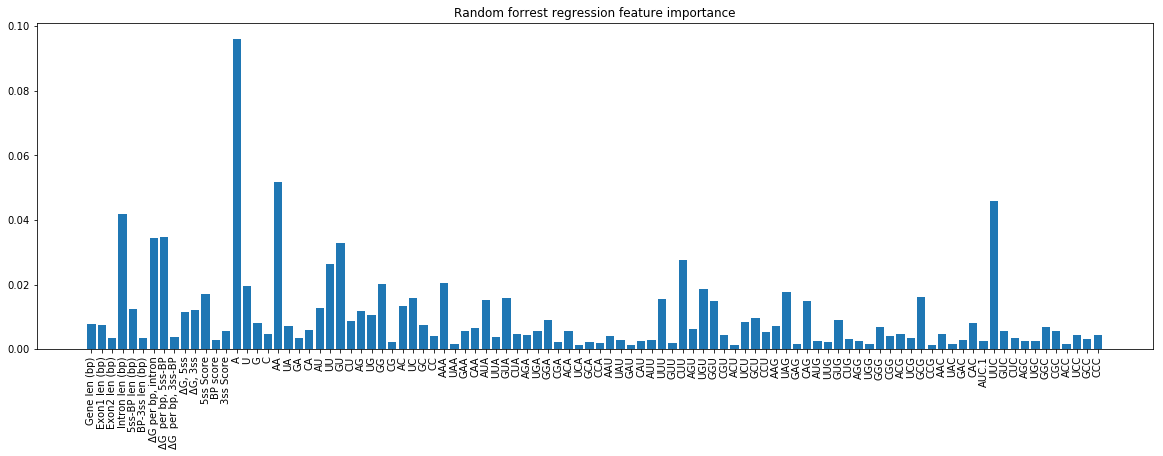

In [15]:
rf = RandomForestRegressor(n_estimators=100, 
                            criterion='mse', 
                            max_features=10, 
                            max_depth=15, 
                            n_jobs=2,
                            random_state=1337)

rf.fit(X_rp_train, y_rp_train)

fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rf.feature_importances_))
ax1.bar(xx, rf.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Random forrest regression feature importance')

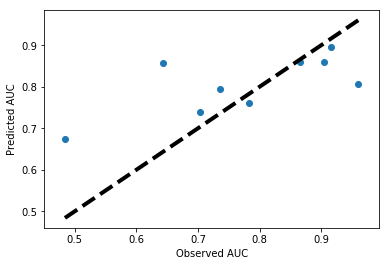

In [16]:
fit_scatter(y_rp_test, rf.predict(X_rp_test))

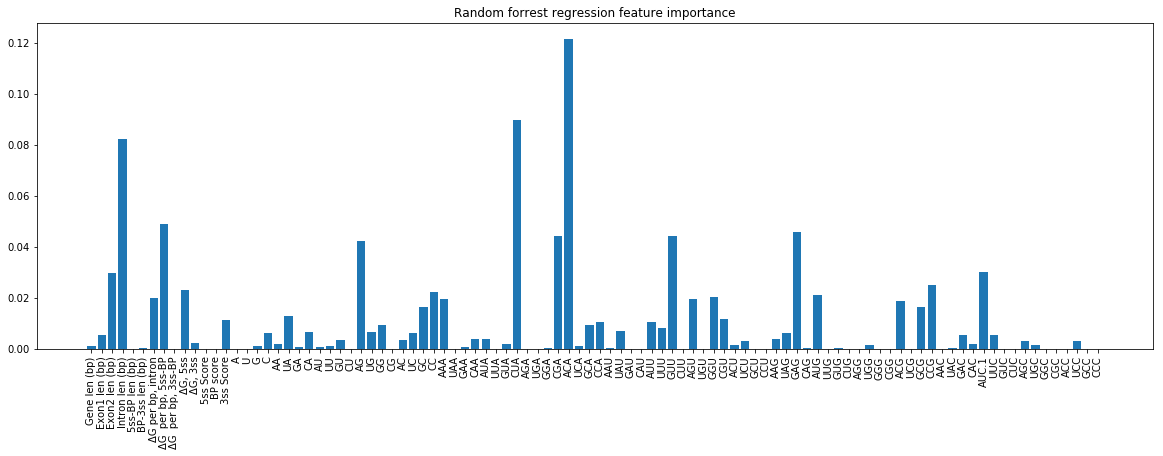

In [17]:
rf = RandomForestRegressor(n_estimators=10, 
                            criterion='mse', 
                            max_features=10, 
                            max_depth=15, 
                            n_jobs=2,
                            random_state=1337)

rf.fit(X_nrp_train, y_nrp_train)

fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rf.feature_importances_))
ax1.bar(xx, rf.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Random forrest regression feature importance')

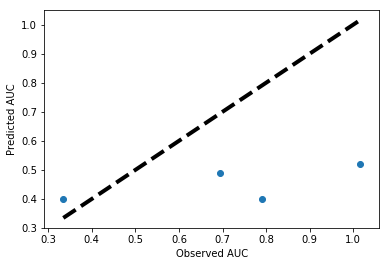

In [18]:
fit_scatter(y_nrp_test, rf.predict(X_nrp_test))

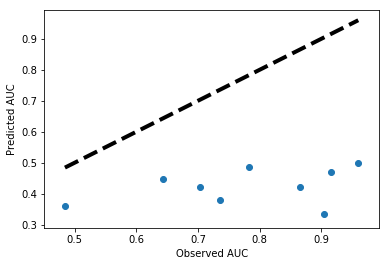

In [19]:
fit_scatter(y_rp_test, rf.predict(X_rp_test))

In [20]:
data_path_2 = os.path.join(os.getcwd(), 'datasets', 'HMM_table_minus.csv')
data_path_3 = os.path.join(os.getcwd(), 'datasets', 'HMM_table_plus.csv')
data_path_4 = os.path.join(os.getcwd(), 'datasets', 'mart_export.csv')
data_path_5 = os.path.join(os.getcwd(), 'datasets', 'intron_locations.csv')

hmm_table_minus = pd.read_csv(data_path_2, delimiter = '\t')
hmm_table_plus = pd.read_csv(data_path_3, delimiter = '\t')
gene_info = pd.read_csv(data_path_4, delimiter = ',')
intron_info = pd.read_csv(data_path_5, delimiter = '\t')
    
print('Number of data points: {}. Number of attributes: {}'.format(hmm_table_plus.shape[0],hmm_table_plus.shape[1]))

Number of data points: 603559. Number of attributes: 6


In [21]:
hmm_table_plus.head(10)

,#TABLE,Rpo21_S2IP,Rpo21_S5IP,Rpo21_S7IP,Rpo21_T4IP,Rpo21_Y1IP
0,chrI_1_+,0.0,0.0,0.0,0.0,0.000000
1,chrI_21_+,0.0,0.0,0.0,0.0,0.000000
2,chrI_41_+,0.0,0.0,0.0,0.0,0.000000
3,chrI_61_+,0.0,0.0,0.0,0.0,0.000000
4,chrI_81_+,0.0,0.0,0.0,0.0,0.016644
5,chrI_101_+,0.0,0.0,0.0,0.0,0.067899
6,chrI_121_+,0.0,0.0,0.0,0.0,0.053452
7,chrI_141_+,0.0,0.0,0.0,0.0,0.000000
8,chrI_161_+,0.0,0.0,0.0,0.0,0.000000
9,chrI_181_+,0.0,0.0,0.0,0.0,0.000000


In [22]:
hmm_table_minus.head(10)

,#TABLE,Rpo21_S2IP,Rpo21_S5IP,Rpo21_S7IP,Rpo21_T4IP,Rpo21_Y1IP
0,chrI_1_-,0.000000,0.000000,0.000000,0.000000,0.000000
1,chrI_21_-,0.000000,0.000000,0.000000,0.000000,0.000000
2,chrI_41_-,-0.144050,-0.144050,-0.144050,-0.144050,-0.144050
3,chrI_61_-,-0.025421,-0.025421,-0.025421,-0.025421,-0.025421
4,chrI_81_-,0.000000,0.000000,0.000000,0.000000,0.000000
5,chrI_101_-,0.224045,0.000000,0.000000,0.000000,0.000000
6,chrI_121_-,0.000000,0.000000,0.000000,0.000000,0.000000
7,chrI_141_-,0.000000,0.000000,0.000000,0.000000,0.000000
8,chrI_161_-,0.000000,0.000000,0.000000,0.000000,0.000000
9,chrI_181_-,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
gene_info.head(10)

,Gene stable ID,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene name,Strand
0,YAL030W,87286,87752,I,SNC1,1
1,YBL026W,170623,171038,II,LSM2,1
2,YBL027W,168423,169376,II,RPL19B,1
3,YBL040C,142112,142868,II,ERD2,-1
4,YBL059C-A,110125,110539,II,CMC2,-1
5,YBL087C,59822,60739,II,RPL23A,-1
6,YBR048W,332831,333812,II,RPS11B,1
7,YBR082C,406628,407169,II,UBC4,-1
8,YBR084C-A,414186,415261,II,RPL19A,-1
9,YBR181C,591712,592774,II,RPS6B,-1


In [24]:
intron_info.head(10)

,ID,ORG,Strand,intron_start,Intron_end,Chromosome,gene_start,gene_end
0,S000000028_C,YAL030W,1,87388,87500,chrI,87286,87752
1,S000000122_C,YBL026W,1,170677,170804,chrII,170623,171038
2,S000000123_C,YBL027W,1,168425,168808,chrII,168423,169376
3,S000000136_C,YBL040C,-1,142750,142846,chrII,142112,142868
4,S000007488_C,YBL059C-A,-1,110421,110505,chrII,110125,110539
5,S000000183_C,YBL087C,-1,60194,60697,chrII,59822,60739
6,S000000252_C,YBR048W,1,332876,333386,chrII,332831,333812
7,S000000286_C,YBR082C,-1,407028,407122,chrII,406628,407169
8,S000002156_C,YBR084C-A,-1,414754,415259,chrII,414186,415261
9,S000000385_C,YBR181C,-1,592417,592768,chrII,591712,592774


In [26]:
from ipywidgets import FloatProgress
from IPython.display import display

new_features = gene_features
f = FloatProgress(min=0, max=117)
display(f)

intron_info.set_index('ORG')

extended_data = gene_features
extended_data['Rpo21_S2IP'] = ''
extended_data['Rpo21_S5IP'] = ''
extended_data['Rpo21_S7IP'] = ''
extended_data['Rpo21_T4IP'] = ''
extended_data['Rpo21_Y1IP'] = ''

for gene in gene_features['ORG']:
    f.value += 1
    print(gene)
    df = pd.DataFrame(np.zeros((0, 5)),columns=['Rpo21_S2IP', 'Rpo21_S5IP', 'Rpo21_S7IP', 'Rpo21_T4IP','Rpo21_Y1IP'])

    gene_info = intron_info[intron_info['ORG'] == gene]
    intron_start = gene_info['intron_start'].iloc[0]
    intron_end = gene_info['Intron_end'].iloc[0]
    strand = gene_info['Strand'].iloc[0]
    chrom = gene_info['Chromosome'].iloc[0]
    #s = "Start: " + str(intron_start) + " end: " + str(intron_end) + " chrom: " + str(chrom)
    i = 0
    if strand == 1:
        for loc in hmm_table_plus['#TABLE']:
            ch, bp, st = loc.split("_")
            if chrom == ch:
                if(intron_start < int(bp) & int(bp) < intron_end):
                    new = hmm_table_plus[hmm_table_plus['#TABLE'] == loc]
                    df = df.append(new.drop(['#TABLE'], axis=1))
    else:
        for loc in hmm_table_minus['#TABLE']:
            ch, bp, st = loc.split("_")
            if chrom == ch:
                if(intron_start < int(bp) & int(bp) < intron_end):
                    new = hmm_table_minus[hmm_table_minus['#TABLE'] == loc]
                    df = df.append(new.drop(['#TABLE'], axis=1))
    #print(df)
    
    
    ndf = pd.DataFrame(np.zeros((0, 5)),columns=['Rpo21_S2IP', 'Rpo21_S5IP', 'Rpo21_S7IP', 'Rpo21_T4IP','Rpo21_Y1IP'])
    ndf.loc[0] = df.mean(axis=0)

    print(ndf)
    print('\n')
    
    extended_data['Rpo21_S2IP'][extended_data['ORG'] == gene] = df['Rpo21_S2IP'].mean()
    extended_data['Rpo21_S5IP'][extended_data['ORG'] == gene] = df['Rpo21_S5IP'].mean()
    extended_data['Rpo21_S7IP'][extended_data['ORG'] == gene] = df['Rpo21_S7IP'].mean()
    extended_data['Rpo21_T4IP'][extended_data['ORG'] == gene] = df['Rpo21_T4IP'].mean()
    extended_data['Rpo21_Y1IP'][extended_data['ORG'] == gene] = df['Rpo21_Y1IP'].mean()
    
    print(extended_data[extended_data['ORG'] == gene])
    

FloatProgress(value=0.0, max=117.0)

YFL039C
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0   -0.229068    0.209159   -0.200656   -0.196892    0.019523




/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/ipykernel_launcher.py:55: Se

       ORG  Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
0  YFL039C  ACT1  0.481           1437              10            1118   

   Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
0              309              266               44             -0.161   

      ...        CGC    ACC    UCC  GCC   CCC  Rpo21_S2IP  Rpo21_S5IP  \
0     ...      0.003  0.013  0.013  0.0  0.01   -0.229068    0.209159   

   Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP  
0   -0.200656   -0.196892   0.0195232  

[1 rows x 106 columns]
YDL029W
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0   -0.561357    0.157919   -0.470862   -0.604262   -0.192436


       ORG  Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
1  YDL029W  ARP2  0.235           1299              22            1154   

   Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
1              123              109               15             -0.227   

      ...      

        ORG  Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
12  YNL004W  HRB1  0.266           1707              30            1335   

    Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
12              342              324               19              -0.21   

       ...        CGC    ACC    UCC    GCC    CCC  Rpo21_S2IP  Rpo21_S5IP  \
12     ...      0.006  0.009  0.006  0.006  0.003  -0.0142164   0.0649351   

    Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP  
12   0.0100769   -0.135867   -0.006414  

[1 rows x 106 columns]
YDR367W
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.077239     0.05447    0.017954   -0.260429    0.077656


        ORG  Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
13  YDR367W  KEI1  0.706            767              30             636   

    Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
13              101               71               31             -0.088  

   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.126086    0.339571    0.326733    0.143005    0.106651


        ORG    Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
24  YHL001W  RPL14B  0.639            815             129             288   

    Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
24              398              351               48             -0.204   

       ...        CGC    ACC    UCC    GCC    CCC  Rpo21_S2IP  Rpo21_S5IP  \
24     ...      0.003  0.013  0.018  0.013  0.013    0.126086    0.339571   

    Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP  
24    0.326733    0.143005    0.106651  

[1 rows x 106 columns]
YIL133C
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.153664    0.232422    -0.21479   -0.224912   -0.040595


        ORG    Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
25  YIL133C  RPL16A  0.522            890              31             569   

    Intron len (

   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.027094   -0.107348   -0.222593   -0.200395   -0.420557


        ORG    Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
36  YPL079W  RPL21B  0.777            904              11             472   

    Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
36              421              359               63              -0.18   

       ...      CGC  ACC    UCC  GCC  CCC  Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  \
36     ...      0.0  0.0  0.005  0.0  0.0   0.0270936   -0.107348   -0.222593   

    Rpo21_T4IP  Rpo21_Y1IP  
36   -0.200395   -0.420557  

[1 rows x 106 columns]
YLR061W
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.103791    0.000308   -0.044324   -0.065304   -0.076108


        ORG    Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
37  YLR061W  RPL22A  0.895            755              12             354   

    Intron len (bp)  5ss-BP len 

   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0   -0.286162    0.204674   -0.407305   -1.012487   -0.250777


        ORG   Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
48  YGL030W  RPL30  0.108            548               3             315   

    Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
48              230              190               41             -0.195   

       ...        CGC  ACC    UCC  GCC  CCC  Rpo21_S2IP  Rpo21_S5IP  \
48     ...      0.004  0.0  0.013  0.0  0.0   -0.286162    0.204674   

    Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP  
48   -0.407305    -1.01249   -0.250777  

[1 rows x 106 columns]
YDL075W
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.075678    0.036874   -0.022437    0.029722   -0.119056


        ORG    Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
49  YDL075W  RPL31A  0.967            763              57             285   

    Intron len (bp)  5ss-BP le

   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.153631    0.111274    -0.16566   -0.362988   -0.009294


        ORG    Gene   AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
60  YDR500C  RPL37B  0.99            656               7             260   

    Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
60              389              355               35             -0.161   

       ...        CGC    ACC    UCC    GCC  CCC  Rpo21_S2IP  Rpo21_S5IP  \
60     ...      0.003  0.008  0.008  0.013  0.0    0.153631    0.111274   

    Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP  
60    -0.16566   -0.362988  -0.0092936  

[1 rows x 106 columns]
YJL189W
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.019352    0.256274   -0.033078   -0.364072   -0.087583


        ORG   Gene   AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
61  YJL189W  RPL39  0.96            542               6             150   

    Intron len (bp)  5ss-B

   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0   -0.038896    0.106814   -0.173986   -0.563881   -0.050367


        ORG   Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
72  YGR214W  RPS0A  0.877           1214              90             669   

    Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
72              455              429               27             -0.158   

       ...        CGC    ACC    UCC    GCC    CCC  Rpo21_S2IP  Rpo21_S5IP  \
72     ...      0.007  0.013  0.011  0.011  0.004   -0.038896    0.106814   

    Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP  
72   -0.173986   -0.563881  -0.0503672  

[1 rows x 106 columns]
YLR048W
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.101542   -0.155655   -0.268698   -0.438889    -0.10234


        ORG   Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
73  YLR048W  RPS0B  0.779           1118              90             669   

    Intron len (bp) 

   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.121563    0.054446   -0.073114   -0.391467    0.145725


        ORG    Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
84  YDR450W  RPS18A  0.767            876              47             394   

    Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
84              435              390               46             -0.208   

       ...        CGC    ACC    UCC    GCC    CCC  Rpo21_S2IP  Rpo21_S5IP  \
84     ...      0.007  0.009  0.012  0.002  0.005    0.121563   0.0544463   

    Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP  
84  -0.0731141   -0.391467    0.145725  

[1 rows x 106 columns]
YML026C
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0     0.19184    0.042492   -0.054595    0.235616    0.024731


        ORG    Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
85  YML026C  RPS18B  0.944            842              47             394   

    Intron len (

   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0   -0.086743   -0.149562    -0.27841   -0.461814   -0.256564


          ORG    Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
96  YLR287C-A  RPS30A  0.898            622               3             189   

    Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
96              430              391               40             -0.192   

       ...        CGC    ACC    UCC    GCC    CCC  Rpo21_S2IP  Rpo21_S5IP  \
96     ...      0.007  0.005  0.005  0.005  0.002   -0.086743   -0.149562   

    Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP  
96    -0.27841   -0.461814   -0.256564  

[1 rows x 106 columns]
YOR182C
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0     0.05222    0.057944    0.066806   -0.205822    0.014844


        ORG    Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
97  YOR182C  RPS30B  0.928            603               3             189   

    Intron l

   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0   -0.124359   -0.071645    0.085868   -0.425156   -0.170882


         ORG   Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
108  YMR079W  SEC14  0.695           1071               9             906   

     Intron len (bp)  5ss-BP len (bp)  BP-3ss len (bp)  ΔG per bp, intron  \
108              156              117               40             -0.146   

        ...      CGC  ACC  UCC  GCC  CCC  Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  \
108     ...      0.0  0.0  0.0  0.0  0.0   -0.124359  -0.0716446   0.0858684   

     Rpo21_T4IP  Rpo21_Y1IP  
108   -0.425156   -0.170882  

[1 rows x 106 columns]
YGL137W
   Rpo21_S2IP  Rpo21_S5IP  Rpo21_S7IP  Rpo21_T4IP  Rpo21_Y1IP
0    0.045438    0.058063   -0.039316   -0.316588   -0.020099


         ORG   Gene    AUC  Gene len (bp)  Exon1 len (bp)  Exon2 len (bp)  \
109  YGL137W  SEC27  0.069           2870              18            2652   

     Intron len (bp)  5ss-BP l

In [27]:
extended_data.head(10)

,ORG,Gene,AUC,Gene len (bp),Exon1 len (bp),Exon2 len (bp),Intron len (bp),5ss-BP len (bp),BP-3ss len (bp),"ΔG per bp, intron",...,CGC,ACC,UCC,GCC,CCC,Rpo21_S2IP,Rpo21_S5IP,Rpo21_S7IP,Rpo21_T4IP,Rpo21_Y1IP
0,YFL039C,ACT1,0.481,1437,10,1118,309,266,44,-0.161,...,0.003,0.013,0.013,0.000,0.010,-0.229068,0.209159,-0.200656,-0.196892,0.0195232
1,YDL029W,ARP2,0.235,1299,22,1154,123,109,15,-0.227,...,0.000,0.017,0.000,0.017,0.033,-0.561357,0.157919,-0.470862,-0.604262,-0.192436
2,YML036W,CGI121,0.740,652,456,90,106,65,42,-0.092,...,0.000,0.029,0.010,0.010,0.000,-0.0541543,-0.0356161,0.0639777,-0.119967,-0.0581131
3,YBL059C-A,CMC2,0.856,415,34,296,85,57,29,-0.074,...,0.000,0.000,0.036,0.012,0.024,-0.111281,-0.128198,-0.011534,-0.128198,0.15143
4,YKL190W,CNB1,0.499,604,52,476,76,58,19,-0.143,...,0.000,0.014,0.000,0.000,0.000,-0.412721,-0.283644,-0.633388,-0.682765,-0.167956
5,YLL050C,COF1,0.483,611,14,418,179,47,133,-0.228,...,0.006,0.000,0.023,0.006,0.006,-0.417632,0.0300949,0.0306087,-0.631088,-0.17065
6,YIL111W,COX5B,0.219,544,1,455,88,57,32,-0.125,...,0.000,0.000,0.012,0.000,0.000,-0.577176,-0.480626,-0.275328,-0.8338,-0.436077
7,YNL130C,CPT1,0.586,1274,50,1132,92,58,35,-0.076,...,0.000,0.011,0.000,0.000,0.011,-0.443997,-0.883211,-0.285724,-0.588632,-0.386646
8,YBL040C,ERD2,0.756,757,22,638,97,63,35,-0.161,...,0.011,0.021,0.021,0.011,0.032,-0.111592,0.700743,-0.259079,-0.30378,0.274822
9,YMR292W,GOT1,0.597,499,22,395,82,64,19,-0.117,...,0.000,0.000,0.025,0.000,0.000,-0.196204,0.340843,-0.0163316,-0.444091,-0.0631817


In [28]:
extended_data.to_csv(path_or_buf='extended_data.csv')

In [29]:
X = extended_data.drop(['ORG', 'Gene','AUC'], axis=1)
y = extended_data['AUC']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

In [30]:
lr = LinearRegression()
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)
predictions = cross_val_predict(lr,X,y=y,cv=kf)

print('Coefficient of determination: {}'.format(r2_score(y, predictions)))
print('Mean absolute error: {}'.format(mean_absolute_error(y, predictions)))
print('Root mean squared error: {}'.format(np.sqrt(mean_squared_error(y, predictions))))

Coefficient of determination: -5.124905342057505
Mean absolute error: 0.36293982807996833
Root mean squared error: 0.5651927176794828


In [31]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)
print('\n')
rfr = RandomForestRegressor()
predictions_rfr = cross_val_predict(rfr,X,y=y,cv=kf)

print('RandomForestRegressor R^2: {}'.format(r2_score(y, predictions_rfr)))
print('RandomForestRegressor MAE: {}'.format(mean_absolute_error(y, predictions_rfr)))
print('RandomForestRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr))))
print('RandomForestRegressor CC: \n{}'.format(np.corrcoef(y, predictions_rfr)))



RandomForestRegressor R^2: 0.30340446913705044
RandomForestRegressor MAE: 0.14191794871794874
RandomForestRegressor RMSE: 0.19060628145450648
RandomForestRegressor CC: 
[[ 1.          0.55821707]
 [ 0.55821707  1.        ]]


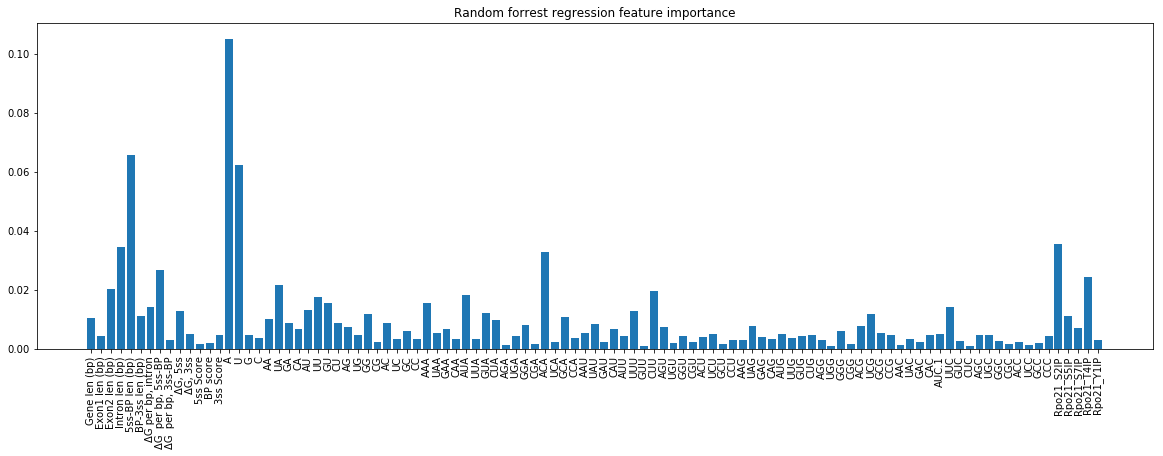

In [51]:
rf = RandomForestRegressor(n_estimators=100, 
                            criterion='mse', 
                            max_features=25, 
                            max_depth=20, 
                            n_jobs=2,
                            random_state=1337)

rf.fit(X_train, y_train)

fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rf.feature_importances_))
ax1.bar(xx, rf.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Random forrest regression feature importance')


In [52]:
predictions_rfr = cross_val_predict(rf,X,y=y,cv=kf)

print('RandomForestRegressor R^2: {}'.format(r2_score(y, predictions_rfr)))
print('RandomForestRegressor MAE: {}'.format(mean_absolute_error(y, predictions_rfr)))
print('RandomForestRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr))))
print('RandomForestRegressor CC: \n{}'.format(np.corrcoef(y, predictions_rfr)))

RandomForestRegressor R^2: 0.3746268012472218
RandomForestRegressor MAE: 0.13141188888888888
RandomForestRegressor RMSE: 0.1805994815962357
RandomForestRegressor CC: 
[[ 1.          0.61818505]
 [ 0.61818505  1.        ]]


In [34]:
#fit_scatter(y_test, rf.predict(X_test))

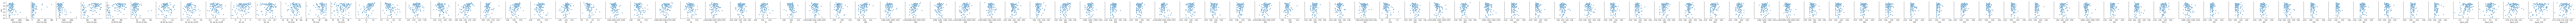

In [35]:
variable_names = X.columns.values
sns.pairplot(extended_data, x_vars=variable_names, y_vars='AUC')

In [36]:
# s2 = extended_data['AUC'].corr(extended_data['Rpo21_S2IP'])
# print("Pearson correlation of Rpo21_S2IP : " + str(s2) + "\n")
# s5 = extended_data['AUC'].corr(extended_data['Rpo21_S5IP'])
# print("Pearson correlation of Rpo21_S5IP : " + str(s5) + "\n")
# s7 = extended_data['AUC'].corr(extended_data['Rpo21_S7IP'])
# print("Pearson correlation of Rpo21_S7IP : " + str(s7) + "\n")
# t4 = extended_data['AUC'].corr(extended_data['Rpo21_T4IP'])
# print("Pearson correlation of Rpo21_T4IP : " + str(t4) + "\n")
# y1 = extended_data['AUC'].corr(extended_data['Rpo21_Y1IP'])
# print("Pearson correlation of Rpo21_Y1IP : " + str(y1) + "\n")
import scipy

s2 = scipy.stats.pearsonr(extended_data['AUC'].values,extended_data['Rpo21_S2IP'].values)
print("Pearson correlation of Rpo21_S2IP : " + str(s2) + "\n")
s5 = scipy.stats.pearsonr(extended_data['AUC'].values,extended_data['Rpo21_S5IP'].values)
print("Pearson correlation of Rpo21_S5IP : " + str(s5) + "\n")
s7 = scipy.stats.pearsonr(extended_data['AUC'].values,extended_data['Rpo21_S7IP'].values)
print("Pearson correlation of Rpo21_S7IP : " + str(s7) + "\n")
t4 = scipy.stats.pearsonr(extended_data['AUC'].values,extended_data['Rpo21_T4IP'].values)
print("Pearson correlation of Rpo21_T4IP : " + str(t4) + "\n")
y1 =scipy.stats.pearsonr(extended_data['AUC'].values,extended_data['Rpo21_Y1IP'].values)
print("Pearson correlation of Rpo21_Y1IP : " + str(y1) + "\n")


Pearson correlation of Rpo21_S2IP : (0.42417627698496707, 1.8798465520226991e-06)

Pearson correlation of Rpo21_S5IP : (-0.0049925675998672711, 0.95739456606016593)

Pearson correlation of Rpo21_S7IP : (0.18324948748477979, 0.047968792411672005)

Pearson correlation of Rpo21_T4IP : (0.2993748120133603, 0.0010417213184675705)

Pearson correlation of Rpo21_Y1IP : (0.055519920643777254, 0.55214374731115579)

